# Рак молочной железы

Информация об атрибутах данных:

    id
    Диагноз (diagnosis): M = злокачественная (malignant), B = (доброкачественная (benign)
    

Для каждого клеточного ядра вычисляются десять вещественных признаков:

    Радиус (radius_mean): расстояния от центра до точек по периметру
    Текстура (texture_mean): стандартное отклонение значений шкалы серого
    Периметр (perimeter_mean): периметр опухоли
    Область (area_mean): область опухоли
    Гладкость (smoothness_mean): локальное изменение длины радиуса
    Компактност (compactness_mean): периметр^2 / площадь - 1,0
    Вогнутость (concavity_mean): выраженность вогнутых участков контура
    Вогнутые точки (concave points_mean): количество вогнутых частей контура
    Симметричность (symmetry_mean)
    Фрактальная размерность (fractal dimension_mean): «аппроксимация береговой линии» ("coastline approximation") - Среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее значение трех самых больших значений) этих признаков были вычислены для каждого изображения, в результате чего было получено 30 признаков. Например, поле 3 — это средний радиус, поле 13 — юго-восточный радиус, поле 23 — наихудший радиус.




Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

In [2]:
# Обучающая выборка
original_train = pd.read_csv('train_breast_cancer.csv', sep=",", usecols = [i for i in range(12)])
# Тестовая выборка 
original_test = pd.read_csv('valid_breast_cancer.csv', sep=",", usecols = [i for i in range(12)])



In [3]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()
test = original_test.drop_duplicates()

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

## Основные характеристики датасетов

In [4]:
# Первые 5 строк датасета
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621


In [5]:
test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
1,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449
2,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267
3,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183
4,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688


In [6]:
# Размер обучающего датасета - 284 строки, 12 колонок
train.shape, test.shape

((284, 12), (284, 12))

In [7]:
# Список колонок
train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [8]:
# Список колонок с типами данных 
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
train.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [9]:
test.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [10]:
# Проверим наличие пустых значений
train.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [11]:
test.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках.

## Построение графиков для понимания структуры данных

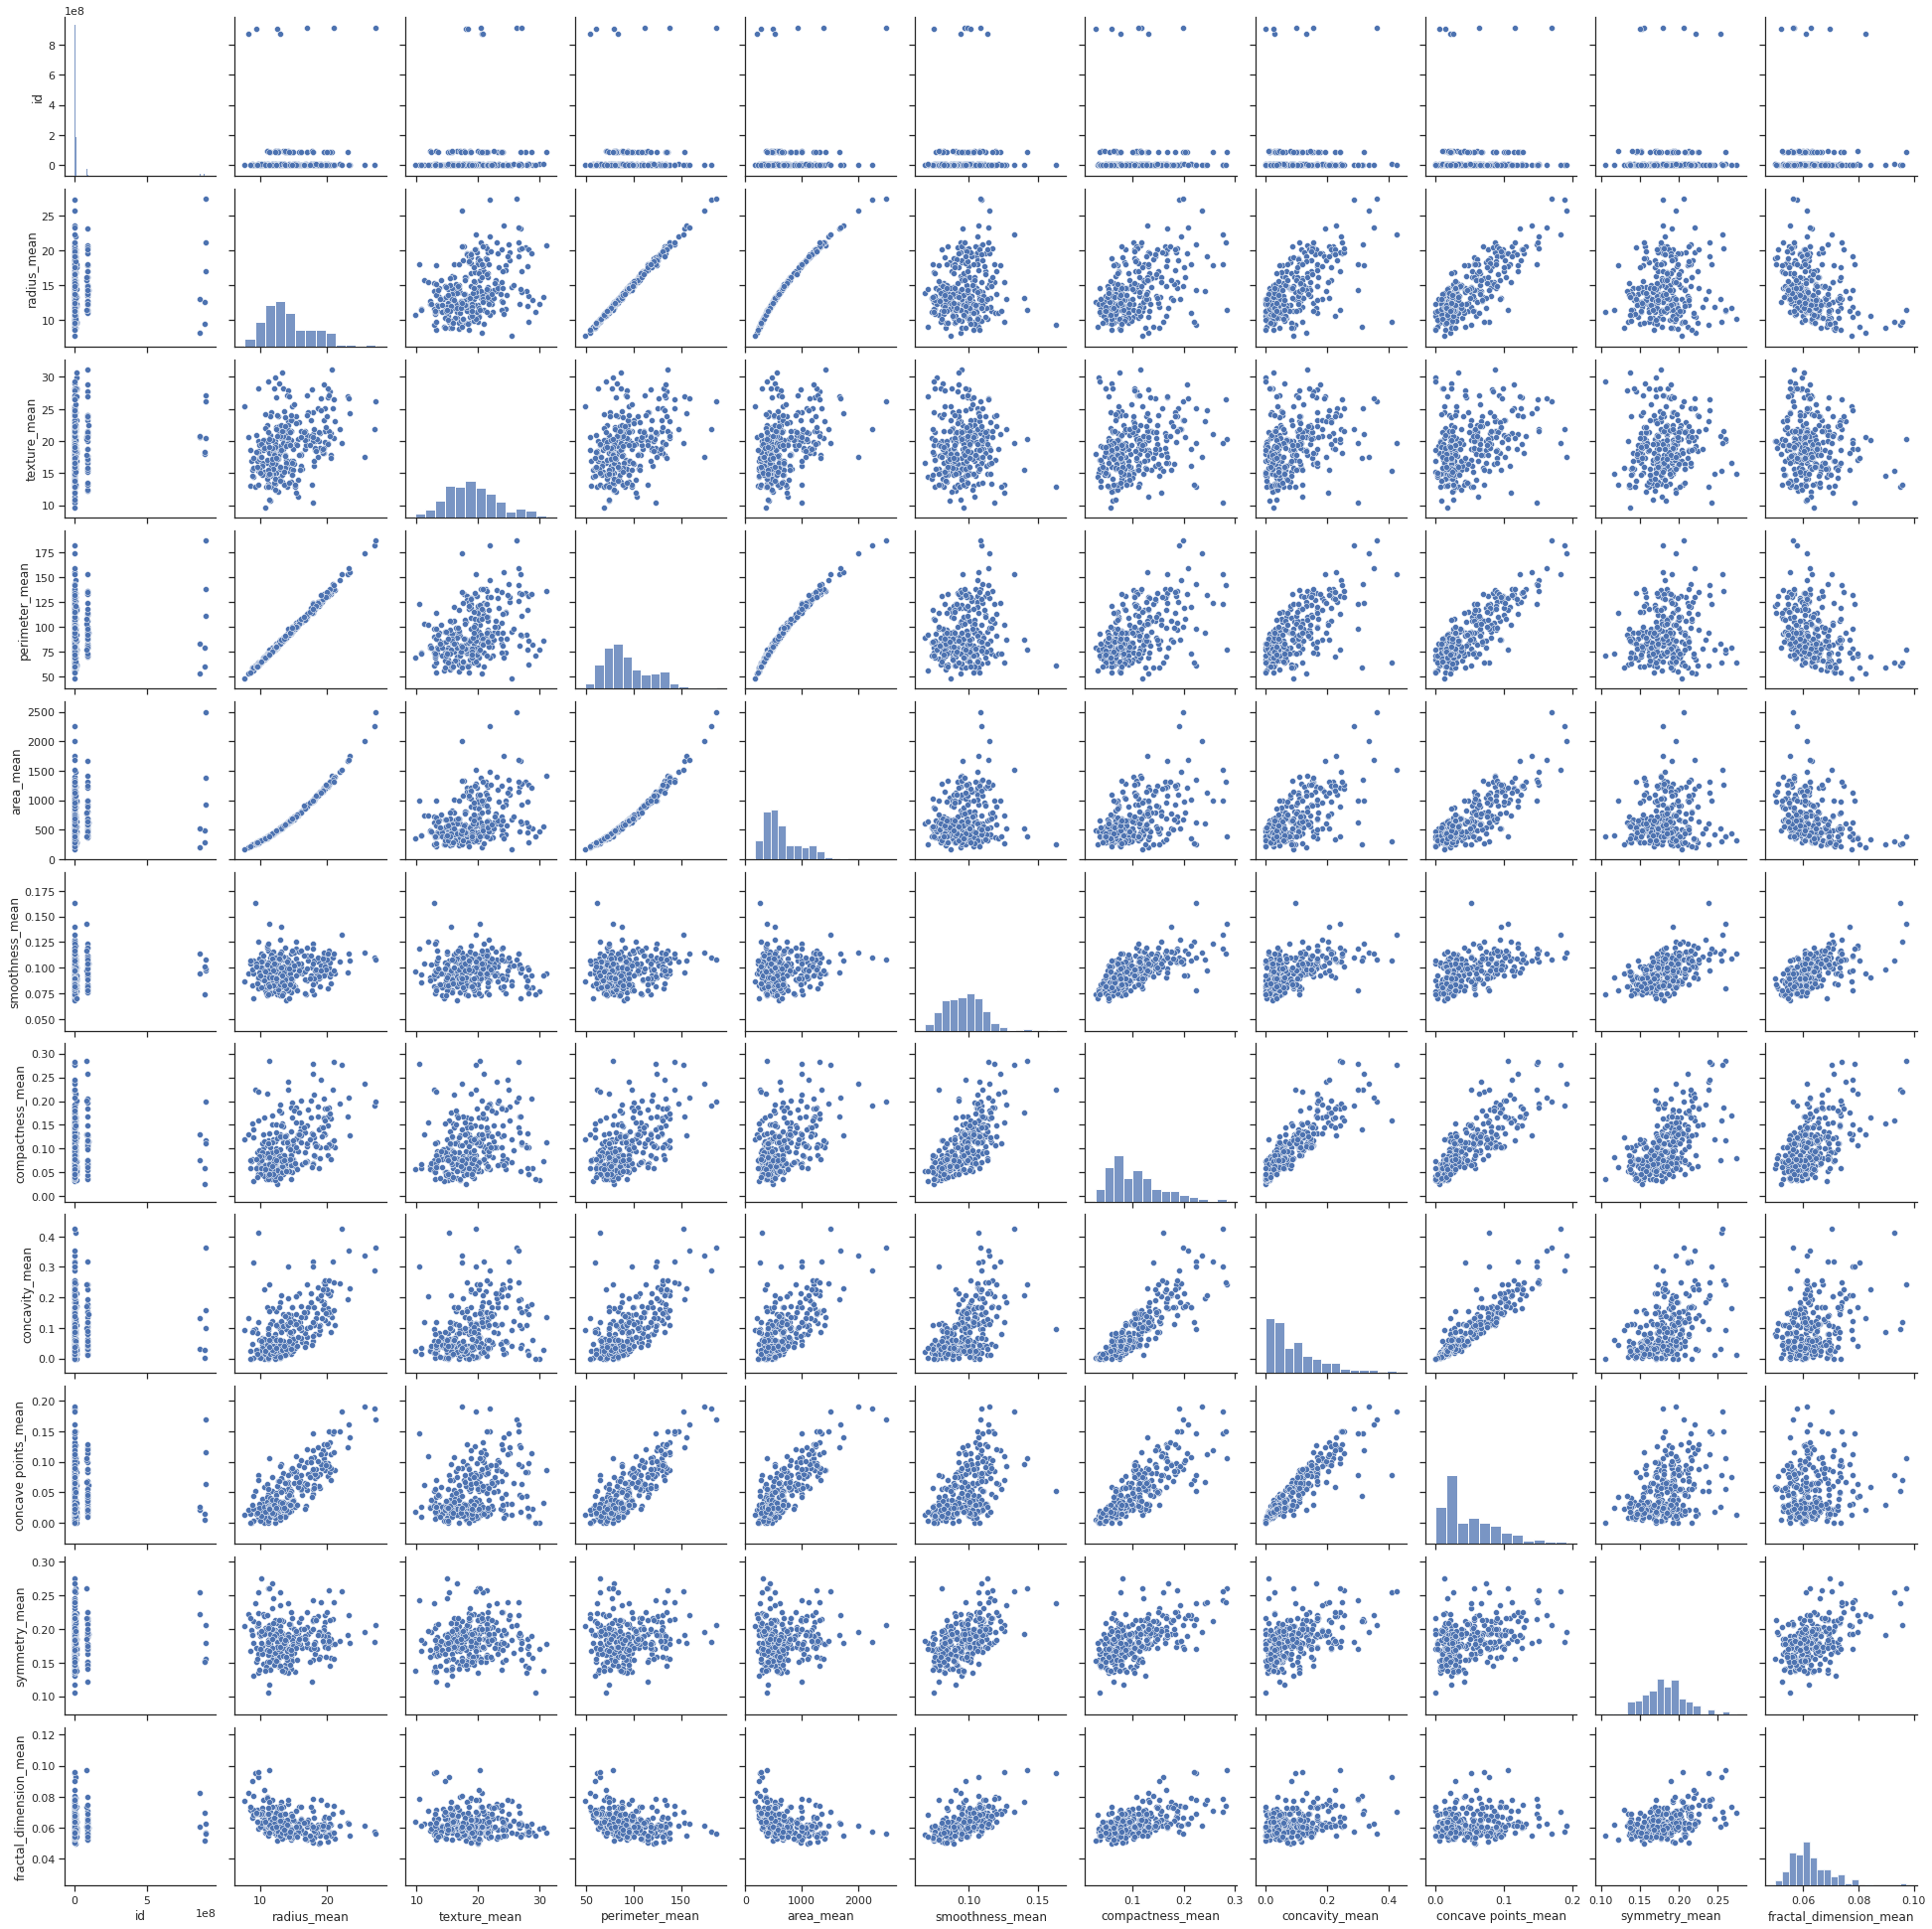

In [12]:
# Парные диаграммы
sns.pairplot(train)

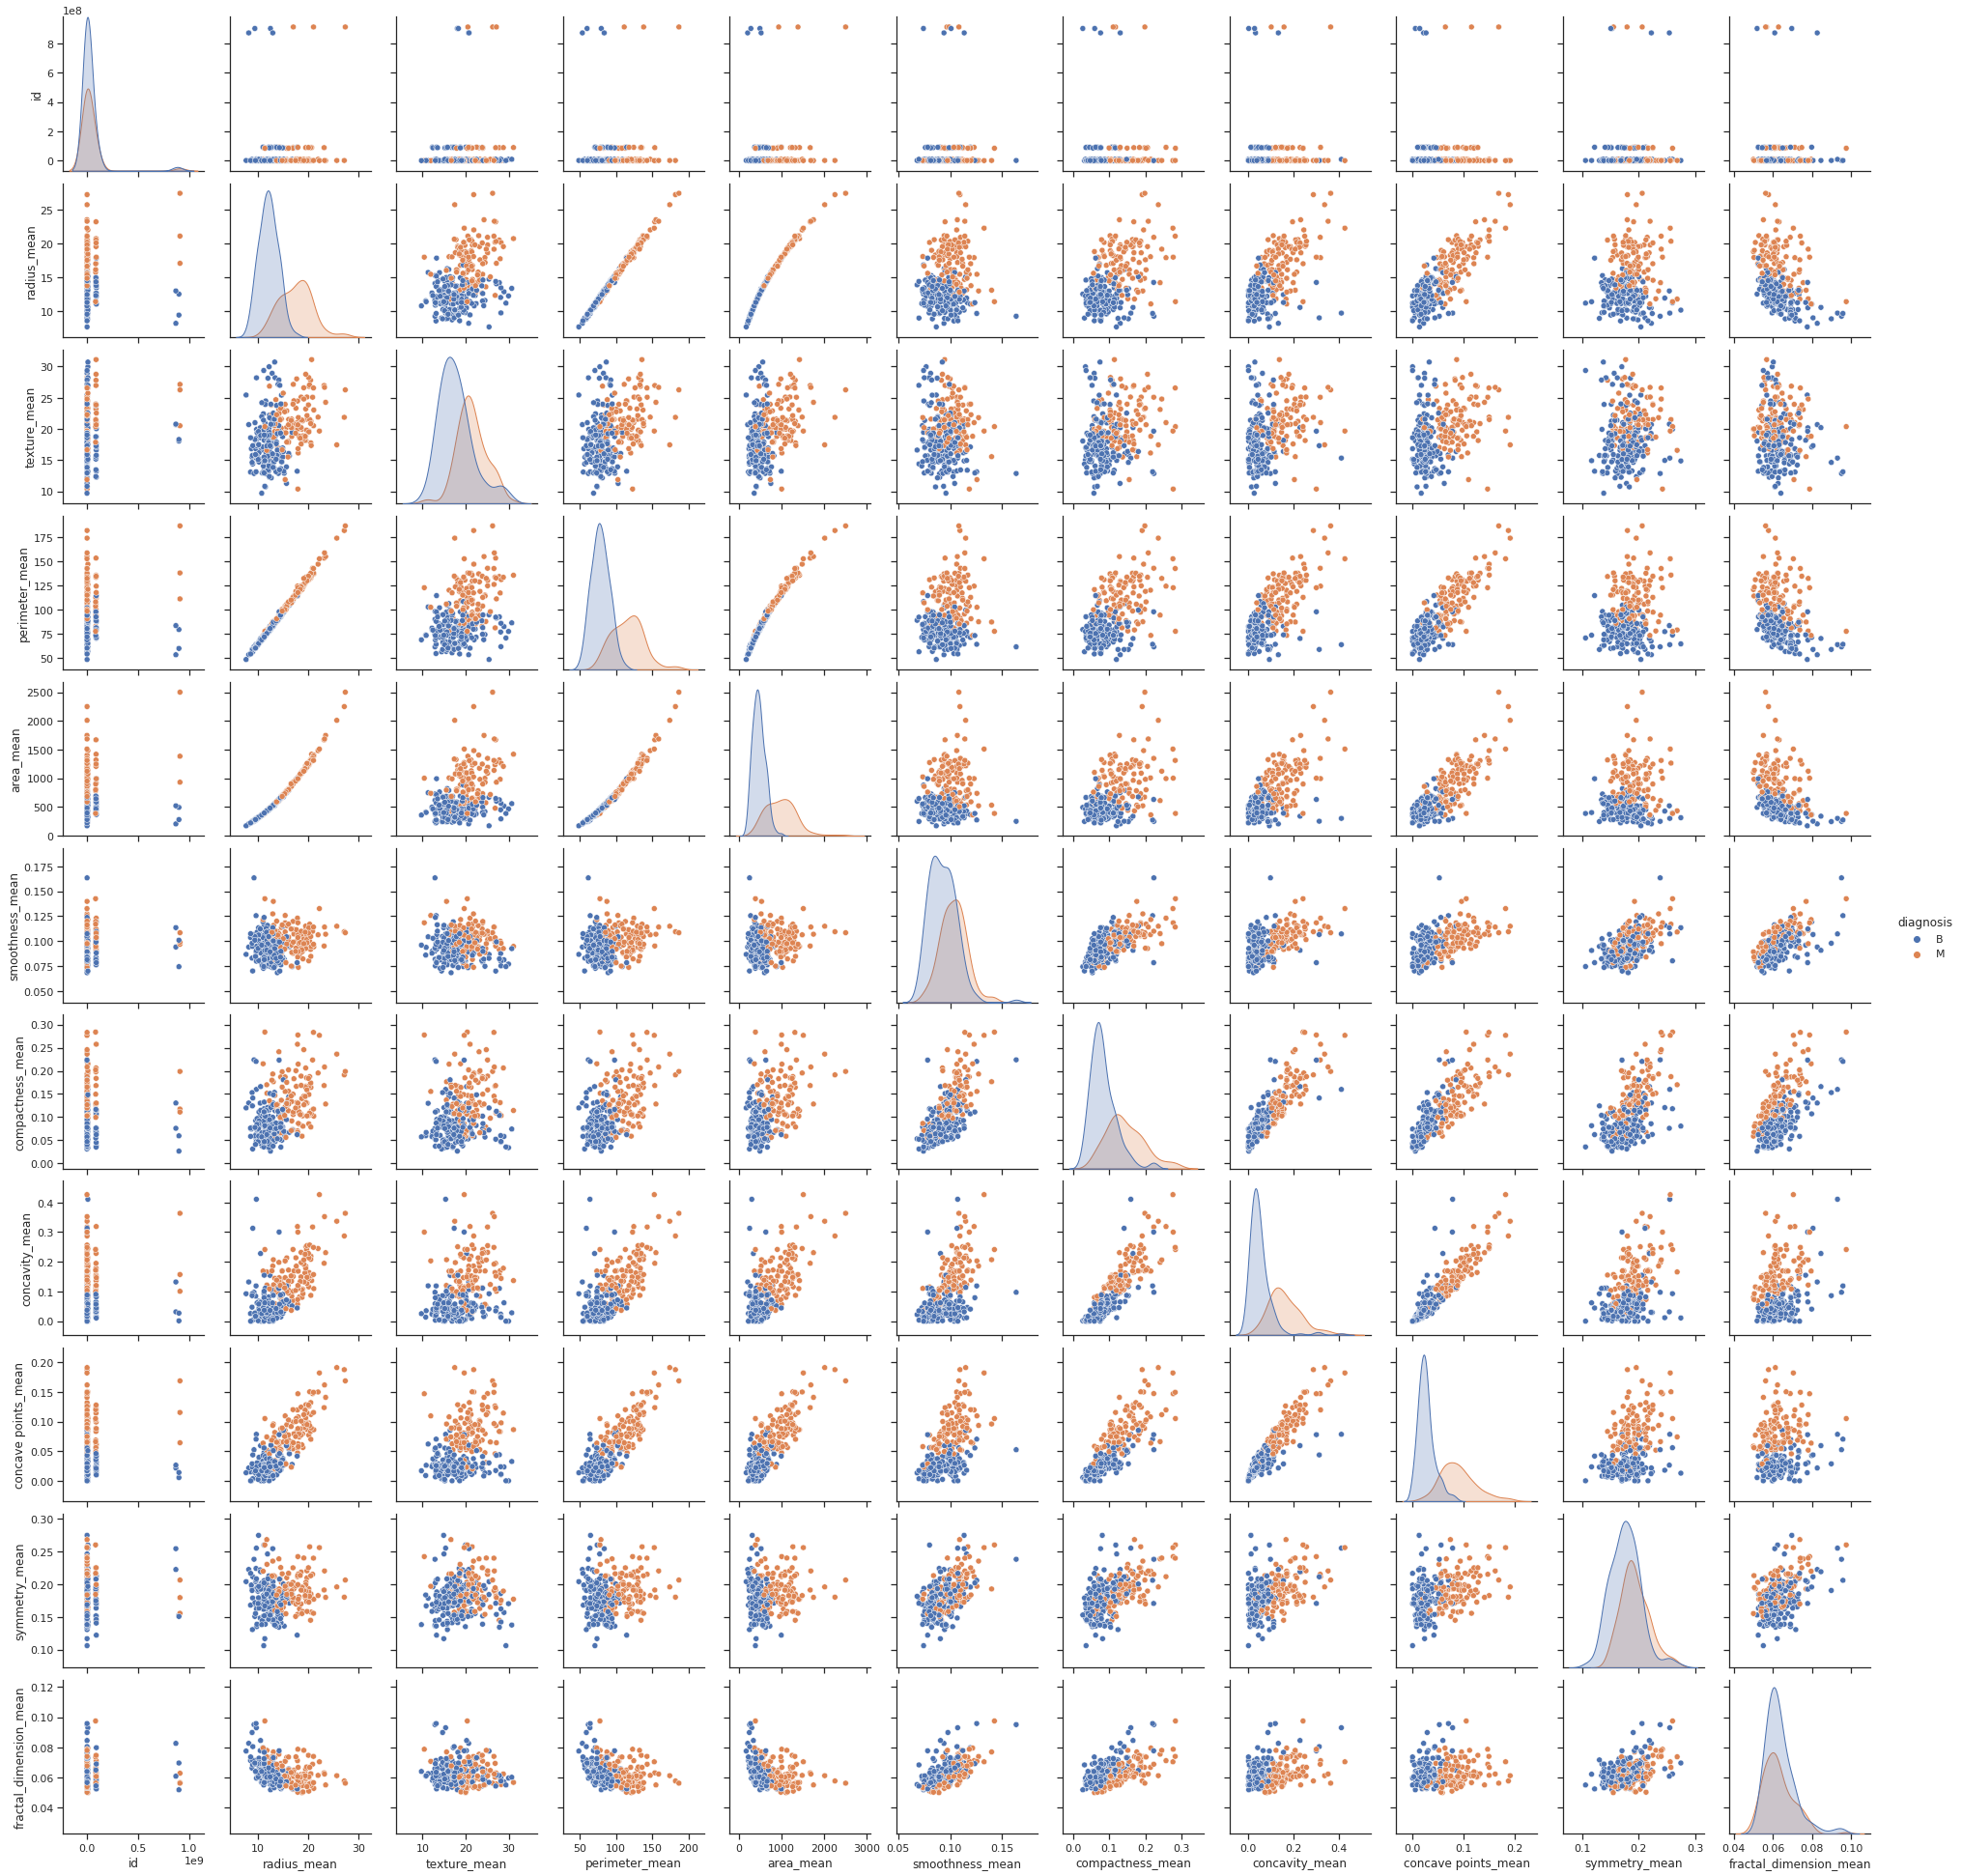

In [13]:
sns.pairplot(train, hue="diagnosis")

In [14]:
# Изменим значения выборки в столбце "диагноз" на бинарное
train.diagnosis.replace(['M', 'B'], [1, 0], inplace=True) 
test.diagnosis.replace(['M', 'B'], [1, 0], inplace=True) 

In [15]:
# Проверим изменение типа данных
train.dtypes

id                          int64
diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [16]:
test.dtypes

id                          int64
diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [17]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['diagnosis'].unique()

array([0, 1])

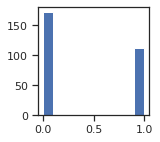

In [18]:
# Оценим дисбаланс классов для diagnosis
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['diagnosis'])
plt.show()

In [19]:
train['diagnosis'].value_counts()

0    172
1    112
Name: diagnosis, dtype: int64

In [20]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['diagnosis'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 60.56%, а класс 1 составляет 39.44%.


Вывод. Дисбаланс классов присутствует, но является приемлемым.

In [21]:
train.dtypes

id                          int64
diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

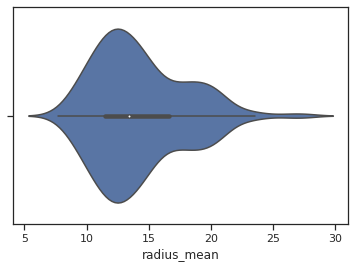

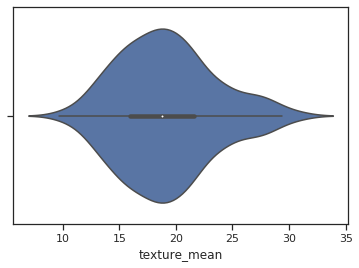

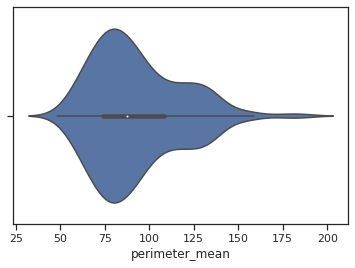

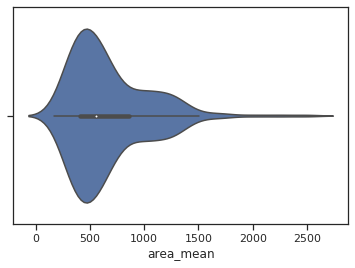

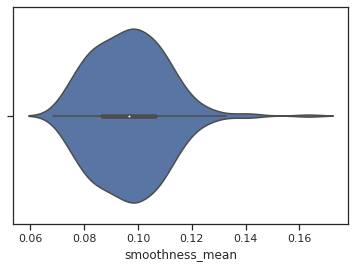

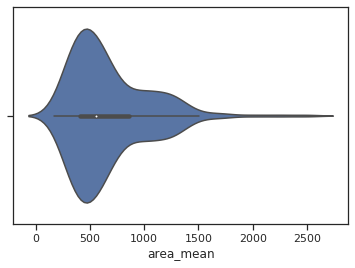

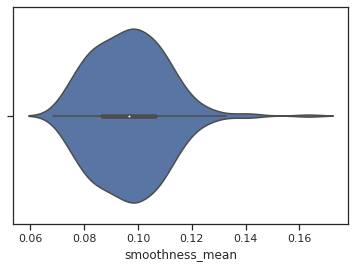

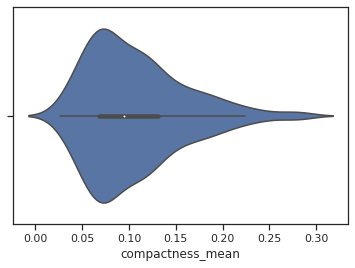

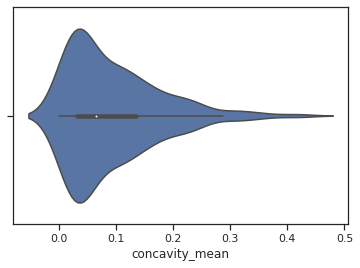

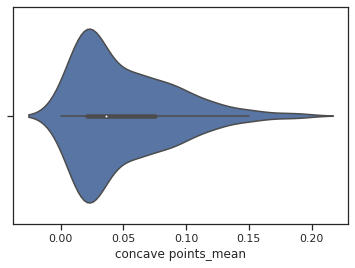

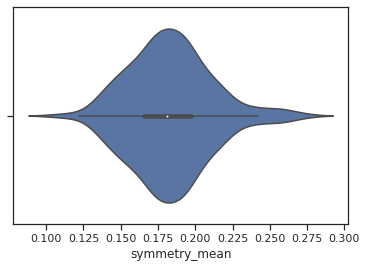

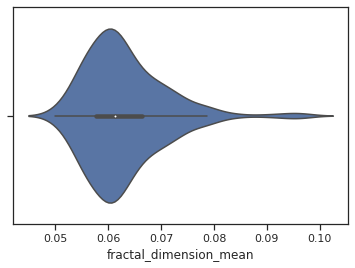

In [22]:
# Скрипичные диаграммы для числовых колонок
for col in ['radius_mean', 
            'texture_mean', 
            'perimeter_mean', 
            'area_mean', 
            'smoothness_mean', 
            'area_mean',
            'smoothness_mean',
            'compactness_mean',
            'concavity_mean',
            'concave points_mean',
            'symmetry_mean',
            'fractal_dimension_mean']:
    sns.violinplot(x=train[col])
    plt.show()


# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [23]:
train.dtypes

id                          int64
diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Для построения моделей будем использовать все признаки кроме признака id.

Категориальные признаки отсутствуют, их кодирования не требуется. Исключением является признак diagnosis, но в представленном датасете он уже закодирован на основе подхода LabelEncoding.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовую выборки.


In [24]:
# Создадим вспомогательные колонки, 
# чтобы наборы данных можно было разделить.
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'

In [25]:
# Колонки для объединения
join_cols = ['diagnosis',
             'radius_mean', 
             'texture_mean', 
             'perimeter_mean', 
             'area_mean', 
             'smoothness_mean', 
             'area_mean',
             'smoothness_mean',
             'compactness_mean',
             'concavity_mean',
             'concave points_mean',
             'symmetry_mean',
             'fractal_dimension_mean',
             'dataset']

In [26]:
data_all = pd.concat([train[join_cols], test[join_cols]])

In [27]:
# Проверим корректность объединения
assert data_all.shape[0] == train.shape[0]+test.shape[0]

In [28]:
data_all.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,dataset
0,0,12.360,18.54,79.01,466.7,0.08477,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,TRAIN
1,1,14.860,23.21,100.40,671.4,0.10440,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,TRAIN
2,0,10.170,14.88,64.55,311.9,0.11340,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,TRAIN
3,0,14.040,15.98,89.78,611.2,0.08458,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,TRAIN
4,0,8.878,15.49,56.74,241.0,0.08293,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,TRAIN


In [29]:
# Числовые колонки для масштабирования
scale_cols = ['radius_mean', 
             'texture_mean', 
             'perimeter_mean', 
             'area_mean', 
             'smoothness_mean', 
             'area_mean',
             'smoothness_mean',
             'compactness_mean',
             'concavity_mean',
             'concave points_mean',
             'symmetry_mean',
             'fractal_dimension_mean']

In [30]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [31]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [32]:
data_all.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_mean_scaled,texture_mean_scaled,perimeter_mean_scaled,area_mean_scaled,smoothness_mean_scaled,compactness_mean_scaled,concavity_mean_scaled,concave points_mean_scaled,symmetry_mean_scaled,fractal_dimension_mean_scaled
0,0,12.360,18.54,79.01,466.7,0.08477,466.7,0.08477,0.06815,0.02643,...,0.254579,0.298613,0.243383,0.290151,0.290151,0.137094,0.137094,0.290151,0.290151,0.149592
1,1,14.860,23.21,100.40,671.4,0.10440,671.4,0.10440,0.19800,0.16970,...,0.372900,0.456544,0.391196,0.467365,0.467365,0.223924,0.223924,0.467365,0.467365,0.547880
2,0,10.170,14.88,64.55,311.9,0.11340,311.9,0.11340,0.08061,0.01084,...,0.150930,0.174839,0.143459,0.548614,0.548614,0.071432,0.071432,0.548614,0.548614,0.187811
3,0,14.040,15.98,89.78,611.2,0.08458,611.2,0.08458,0.05895,0.03534,...,0.334091,0.212039,0.317808,0.288435,0.288435,0.198388,0.198388,0.288435,0.288435,0.121373
4,0,8.878,15.49,56.74,241.0,0.08293,241.0,0.08293,0.07698,0.04721,...,0.089782,0.195468,0.089489,0.273540,0.273540,0.041357,0.041357,0.273540,0.273540,0.176676


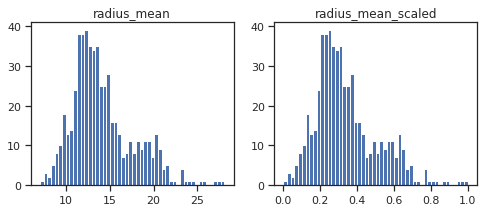

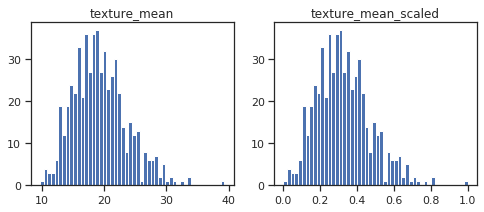

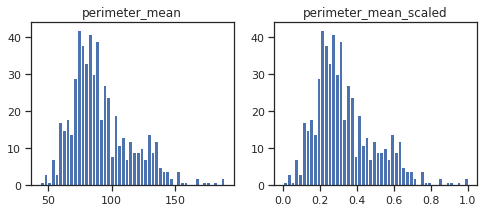

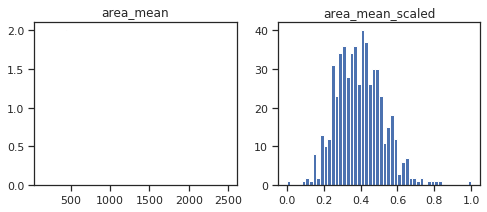

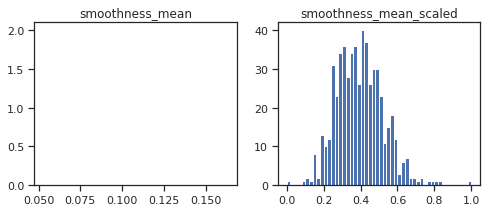

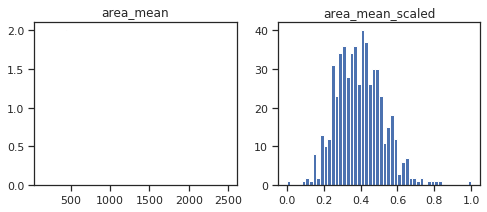

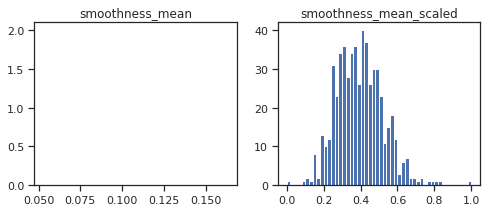

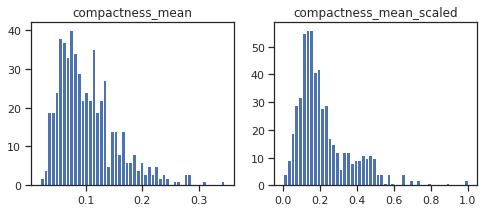

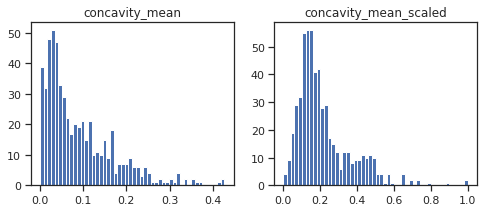

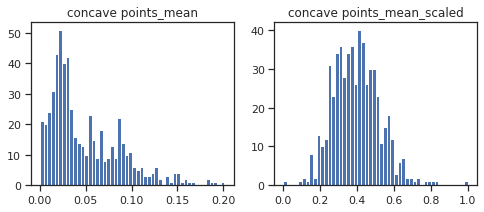

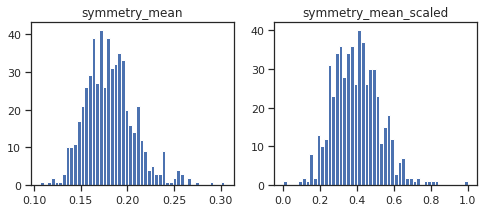

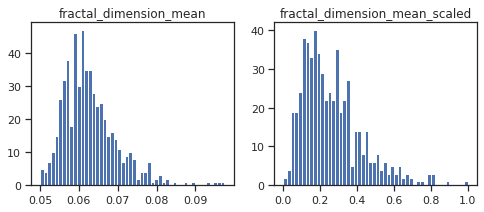

In [34]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.